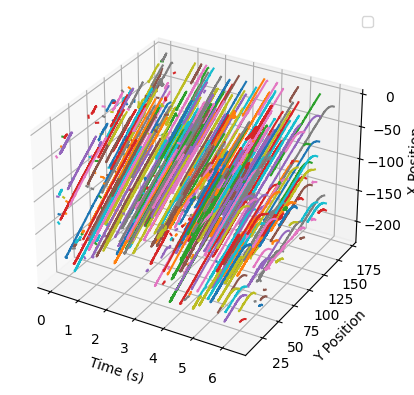

Time range:  0.0  to  6.304799556732178


In [178]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime

# Load the data from the file
data = np.loadtxt("/content/slider_far_timescaled.txt")

# Extract the feature IDs, timestamps, X, and Y coordinates of the tracked points
feature_ids = data[:, 0]
timestamps = data[:, 1]
X = data[:, 2]
Y = data[:, 3]

# Convert the timestamps to elapsed time in seconds
#assuming that the file contains the time in milliseconds since the start of the recording.

elapsed_time = (timestamps - timestamps[0]) / 1.0
 
# Create a dictionary to group the points by feature ID
groups = {}
for i in range(len(feature_ids)):
    feature_id = int(feature_ids[i])
    if feature_id not in groups:
        groups[feature_id] = []
    groups[feature_id].append([elapsed_time[i],Y[i],-1* X[i]])

# Create a 3D scatter plot of the points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for feature_id, group in groups.items():
    group = np.array(group)
    ax.plot(group[:,0], group[:,1], group[:,2])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Y Position')
ax.set_zlabel('X Position')
plt.show()
print("Time range: ", np.min(timestamps), " to ", np.max(timestamps))



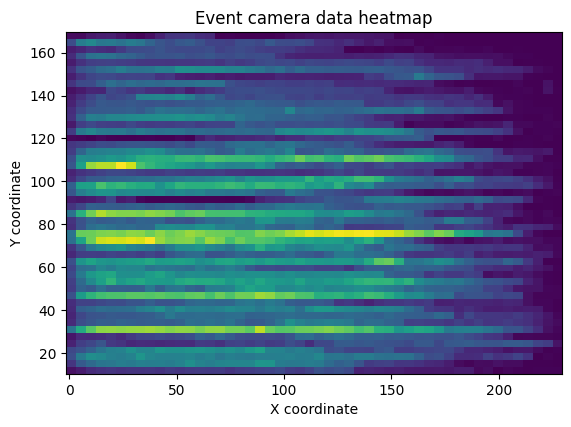

In [153]:
# Load data from text file
#data = np.loadtxt("/content/boxes_rotation.txt")
data = np.loadtxt("/content/slider_far_timescaled.txt")

# Extract X-Y coordinates from the data
x = data[:, 2]
y = data[:, 3]

# Create a heatmap
heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')

# Set plot title and axis labels
plt.title('Event camera data heatmap')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

# Display the plot
plt.show()


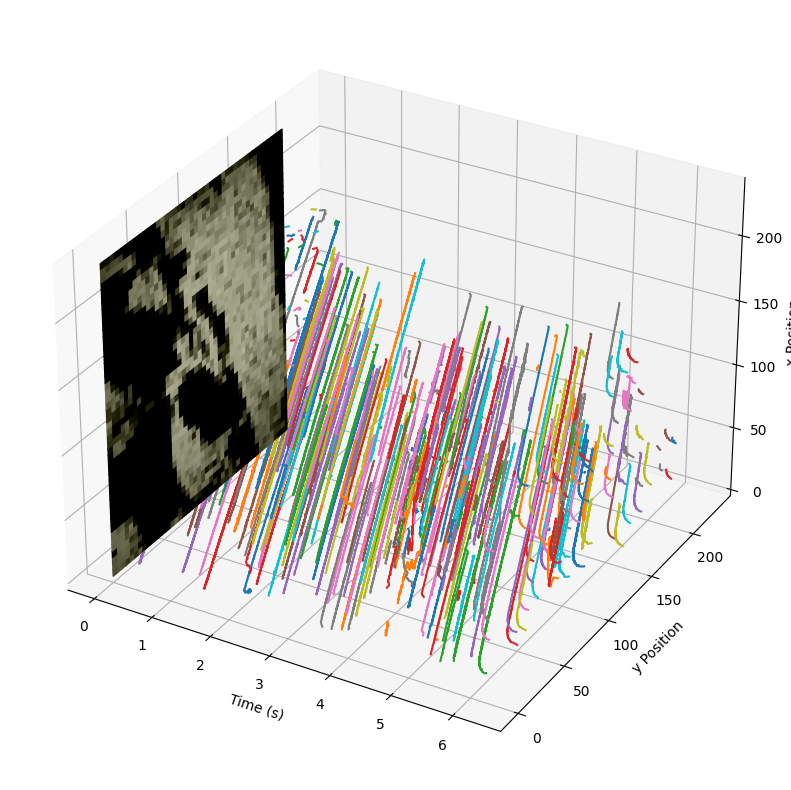

Time range:  0.0  to  6.304799556732178


In [202]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
 

img = plt.imread('/content/frame_00000003.png')
# img = img.transpose(1, 0, 2)


# Create figure and 3D axes
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Set up x, y and z coordinates
z,y = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
x = np.zeros_like(z)
ax.plot_surface(x, y, z, facecolors=img)


# Load the data from the file
data = np.loadtxt("/content/slider_far_timescaled.txt")

# Extract the feature IDs, timestamps, X, and Y coordinates of the tracked points
feature_ids = data[:, 0]
timestamps = data[:, 1]
X = data[:, 2]
Y = data[:, 3]

# Convert the timestamps to elapsed time in seconds
elapsed_time = (timestamps - timestamps[0]) / 1.0

# Create a dictionary to group the points by feature ID
groups = {}
for i in range(len(feature_ids)):
    feature_id = int(feature_ids[i])
    if feature_id not in groups:
        groups[feature_id] = []
    groups[feature_id].append([elapsed_time[i], Y[i], X[i]])

# Plot the tracked points as a scatter plot
for feature_id, group in groups.items():
    group = np.array(group)
    ax.plot(group[:, 0], group[:, 2], group[:, 1])

# fig = plt.figure(figsize=(10, 10))
ax.set_xlabel('Time (s)')
ax.set_ylabel('y Position')
ax.set_zlabel('x Position')
# ax.set_box_aspect((1,1,1)) 

plt.show()

print("Time range: ", np.min(timestamps), " to ", np.max(timestamps))


In [155]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Load image as numpy array
# img = plt.imread('/content/2-2.png')

# # Transpose the img array
# img = img.transpose(1, 0, 2)

# # Create figure and 3D axes
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# # Set up x, y and z coordinates
# y, z = np.meshgrid(np.arange(img.shape[1]), np.arange(img.shape[0]))
# x = np.zeros_like(x)

# # Plot the image as a surface with RGB values as the facecolors
# ax.plot_surface(x, y, z, facecolors=img)

# # Show the plot
# plt.show()